# Global analysis

In [3]:
import collections
import pandas as pd
from glob import glob
import os
import math
from bioat.lib.libcircos import Garc, Gcircle, table_hg38_chromosome_length, table_hg38_cytoband
from bioat.lib.libcolor import plot_colortable
import matplotlib.pyplot as plt

pd.set_option("max_colwidth", 40)  # column最大宽度
pd.set_option("display.width", 120)  # dataframe宽度
pd.set_option("display.max_columns", None)  # column最大显示数
pd.set_option("display.max_rows", 50)  # row最大显示数

## circos plot

In [12]:
# resources
url = "https://raw.githubusercontent.com/hermanzhaozzzz/bioat/master/data/circos"

### 辅助函数

#### plot_colortable

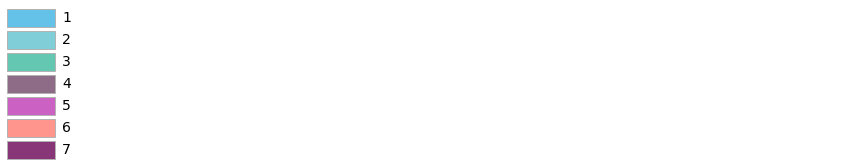

In [13]:
# %% function for legend
# %%% test func plot_colortable
colors = ['#64C1E8',
          '#80CED7',
          '#63C7B2',
          '#8E6C88',
          '#CA61C3',
          '#FF958C',
          '#883677']
g = plot_colortable(colors, ncols=1, labels=[1, 2, 3, 4, 5, 6, 7])
# g

#### gcircle_add_garc

In [14]:
def gcircle_add_garc(x):
    arc = Garc(
        arc_id=x['chr'], size=x['end'], interspace=1, raxis_range=(920, 950), 
        labelposition=40, label_visible=True, facecolor='#FFFFFF'
    )
    circle.add_garc(arc)

### table
#### chromosomes

In [15]:
df_chrom = table_hg38_chromosome_length()
df_chrom = df_chrom[df_chrom['chr'].map(lambda x: x not in ['chrY', 'chrM'])].copy()
df_chrom

,chr,start,end
0,chr1,1,249250621
1,chr2,1,243199373
2,chr3,1,198022430
3,chr4,1,191154276
4,chr5,1,180915260
5,chr6,1,171115067
6,chr7,1,159138663
7,chr8,1,146364022
8,chr9,1,141213431
9,chr10,1,135534747


#### cytoBand

In [16]:
df_cytoband = table_hg38_cytoband()
df_cytoband = df_cytoband[df_cytoband['chr'].map(lambda x: x not in ['chrY', 'chrM'])].copy()
df_cytoband['name'] = df_cytoband['chr']
df_cytoband['start'] = df_cytoband['start'] - 1
df_cytoband['width'] = df_cytoband['end'] - df_cytoband['start']
df_cytoband

,chr,start,end,value1,value2,name,width
0,chr1,-1,2300000,p36.33,gneg,chr1,2300001
1,chr1,2299999,5300000,p36.32,gpos25,chr1,3000001
2,chr1,5299999,7100000,p36.31,gneg,chr1,1800001
3,chr1,7099999,9100000,p36.23,gpos25,chr1,2000001
4,chr1,9099999,12500000,p36.22,gneg,chr1,3400001
...,...,...,...,...,...,...,...
846,chrX,134499999,138900000,q26.3,gneg,chrX,4400001
847,chrX,138899999,141200000,q27.1,gpos75,chrX,2300001
848,chrX,141199999,143000000,q27.2,gneg,chrX,1800001
849,chrX,142999999,148000000,q27.3,gpos100,chrX,5000001


#### points

In [17]:
# sort_keys = df_points.groupby('<sample>').count().sort_values(by='chr', ascending=False).index
sort_keys = ['DetectSeq_SIRT6-DddA11_REP-1', 'DetectSeq_SIRT6-DddA11_REP-2',
             'DetectSeq_JAK2-DddA11_REP-1', 'DetectSeq_JAK2-DddA11_REP-2',
             'DetectSeq_ATP8-DddA11_REP-1', 'DetectSeq_ATP8-DddA6_REP-1', 'DetectSeq_ATP8-DddAwt_REP-1']
colors = ['#64C1E8',
          '#80CED7',
          '#5AB4C8',
          '#78C8C8',
          '#FF958C',
          '#D7BFF8',
          '#F8EDD0']
df_points = pd.read_csv('../final_list_after_igv_check/2023-04-24_merged_final_list_add_header_poisson_result.csv',
                        usecols=['<sample>', 'chr_name', 'region_start', 'region_end', 'treat_mut_count.norm'])
df_points.columns = ['<sample>', 'chr', 'start', 'end', 'value1']
df_points = df_points[df_points['chr'].map(lambda x: x not in ['chrY', 'chrM'])].copy()
df_points['log10_value'] = df_points['value1'].map(math.log10)
df_points

,<sample>,chr,start,end,value1,log10_value
0,DetectSeq_ATP8-DddA11_REP-1,chr11,28107123,28107196,0.113256,-0.945938
1,DetectSeq_ATP8-DddA11_REP-1,chr4,127523472,127523528,0.125178,-0.902473
2,DetectSeq_ATP8-DddA11_REP-1,chr10,79996559,79996604,0.095374,-1.020572
3,DetectSeq_ATP8-DddA11_REP-1,chr20,36808712,36808741,0.089413,-1.048601
4,DetectSeq_ATP8-DddA11_REP-1,chr9,115952242,115952303,0.095374,-1.020572
...,...,...,...,...,...,...
15392,DetectSeq_SIRT6-DddA11_REP-2,chr1,148725246,148725266,0.060375,-1.219144
15393,DetectSeq_SIRT6-DddA11_REP-2,chr8,81158725,81158758,0.069663,-1.156996
15394,DetectSeq_SIRT6-DddA11_REP-2,chr8,100191816,100191830,0.060375,-1.219144
15395,DetectSeq_SIRT6-DddA11_REP-2,chr17,32831978,32831991,0.097529,-1.010868


### plot

#### plot chromosomes

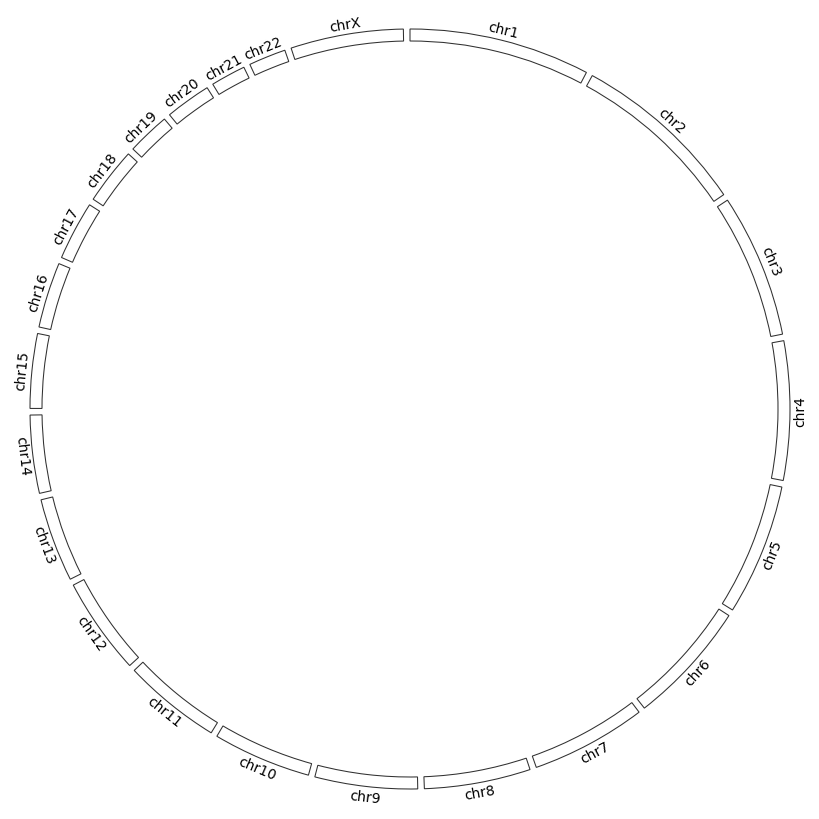

In [18]:
# 实例化一个Gcircle对象
circle = Gcircle()
df_chrom.apply(gcircle_add_garc, axis=1)
circle.set_garcs()
# circle.figure;

#### plot cytoband

- cytoband 染色体带: 处于中期的细胞染色体上形成的用于识别特定染色体的带型

In [19]:
df_cytoband.head()

,chr,start,end,value1,value2,name,width
0,chr1,-1,2300000,p36.33,gneg,chr1,2300001
1,chr1,2299999,5300000,p36.32,gpos25,chr1,3000001
2,chr1,5299999,7100000,p36.31,gneg,chr1,1800001
3,chr1,7099999,9100000,p36.23,gpos25,chr1,2000001
4,chr1,9099999,12500000,p36.22,gneg,chr1,3400001


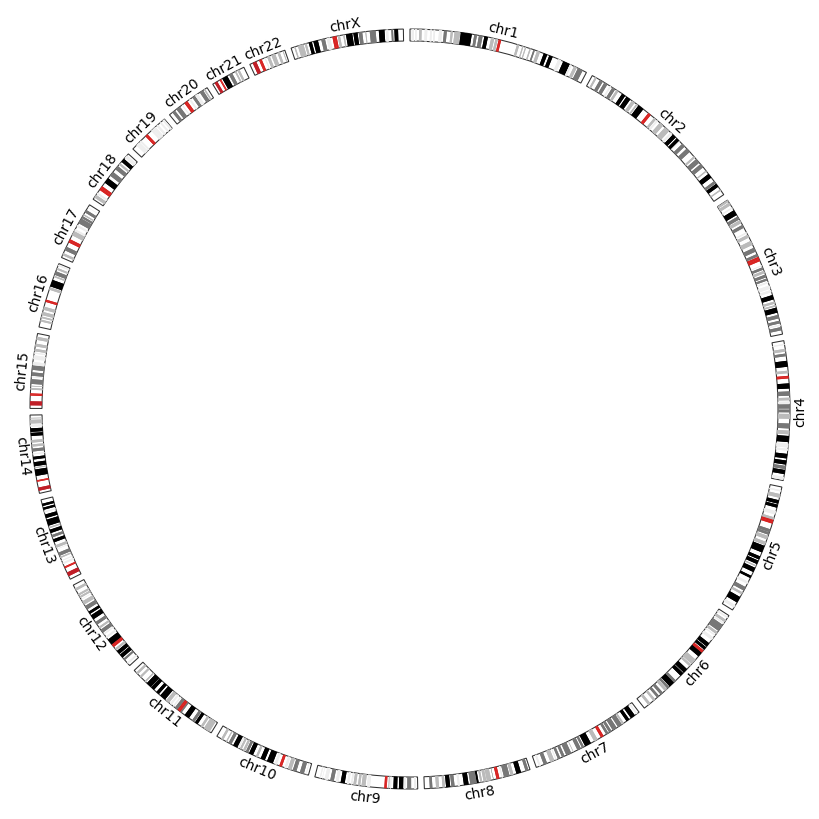

In [23]:
arcdata_dict = collections.defaultdict(dict)
for idx, line in df_cytoband.iterrows():
    # print(line)
    name = line['name']
    start = line['start']
    width = line['width']
    cyto = line['value2']
    
    
    if name not in arcdata_dict:
        arcdata_dict[name]["positions"] = []
        arcdata_dict[name]["widths"] = []
        arcdata_dict[name]["colors"] = []
    arcdata_dict[name]["positions"].append(start)
    arcdata_dict[name]["widths"].append(width)
    arcdata_dict[name]["colors"].append(color_dict[cyto])

for key in arcdata_dict:
    circle.barplot(key, data=[1] * len(arcdata_dict[key]["positions"]), positions=arcdata_dict[key]["positions"],
                   width=arcdata_dict[key]["widths"], raxis_range=[920, 950], facecolor=arcdata_dict[key]["colors"])

circle.figure

#### plot point

[795, 915]
[675, 795]
[555, 675]
[435, 555]
[315, 435]
[195, 315]
[75, 195]


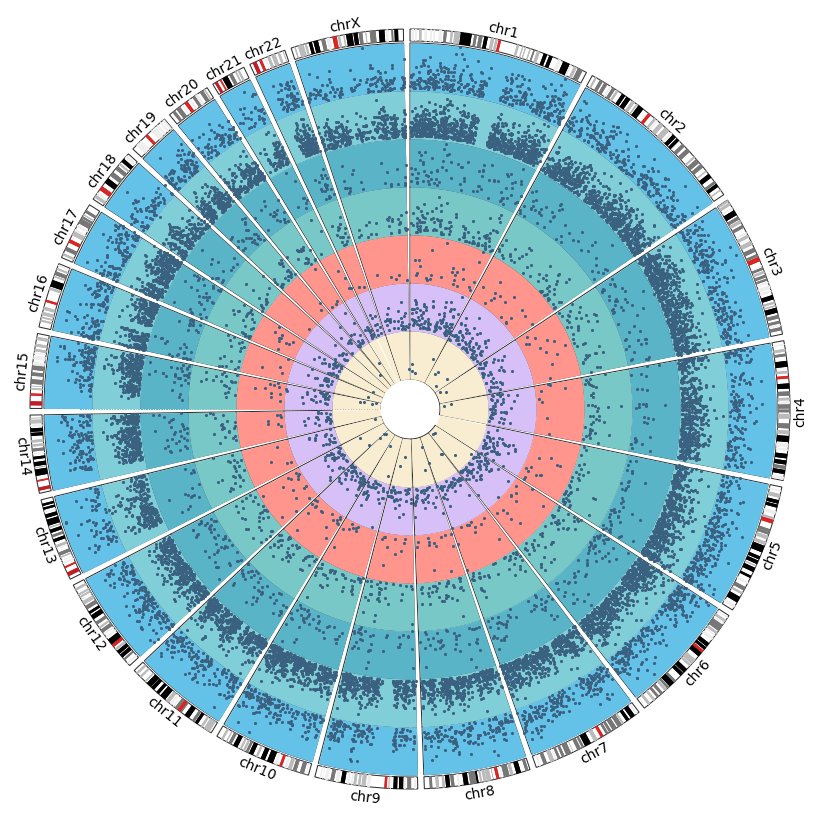

In [25]:
# %%% scatter plot  1s per 1k rows
keys_colors = list(zip(sort_keys, colors))
raxis_range = [915, 1035]

for sort_key, color in keys_colors:
    df = df_points.query('`<sample>`==@sort_key')
    df = df.copy()

    df['pos'] = raxis_range[1] - raxis_range[0]
    raxis_range[0] = raxis_range[0] - 120
    raxis_range[1] = raxis_range[1] - 120
    print(raxis_range)
    vmin = df['log10_value'].min()
    vmax = df['log10_value'].max()

    for idx, point in df_chrom.iterrows():  # 考虑把它放外头
        circle.fillplot(
            point['chr'],
            data=df['pos'],
            # data=[raxis_range[1] - raxis_range[0]],
            rlim=[0, raxis_range[1] - raxis_range[0]],
            raxis_range=raxis_range,
            facecolor=color,
            edgecolor='white'
        )

    for chrom, point in df.groupby('chr'):
        # print(point)
        # print(color)

        circle.scatterplot(
            chrom,
            data=point['log10_value'],
            positions=(point['start'] + point['end']) / 2,
            rlim=[vmin - 0.05 * abs(vmin), vmax + 0.05 * abs(vmax)],
            raxis_range=raxis_range,
            facecolor="#3B6181",
            # edgecolor='black',
            spine=True,
            markersize=5
        )

circle.figure

In [28]:
# %%% save fig 1s per 1k rows
# !pwd
circle.figure.savefig("../pycircos/project_out.pdf", dpi=300)

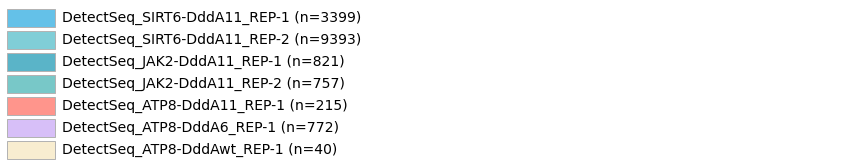

In [27]:
# %%% plot legend
df_sort_keys = pd.DataFrame(sort_keys, columns=['<sample>'])
df_sort_values = df_points.groupby('<sample>').count()['chr'].reset_index()
labels = pd.merge(df_sort_keys, df_sort_values).apply(
    lambda x: f'{x["<sample>"]} (n={x["chr"]})', axis=1
)

plot_colortable(colors=colors, ncols=1, labels=labels.tolist())
plt.savefig("../pycircos/project_out_legend.pdf")

## classification for TAS-dependent and TAS-independent off-target

### get art files

```bash
# 使用TALE的左右两边的序列来align
# 拿到align后的art file
# plot art生成pdf
/gpfs/user/zhaohuanan/3.project/2022_DdCBE-3D-Genome_topic/2022-09-30_Detect-seq_batch-1_ATP8_JAK2_SIRT6/art/plot_art.sh
```

```bash
# for backup
       │ File: plot_art.sh
───────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1   │ # bipython==1.78!!!
   2   │ 
   3   │ 
   4   │ GENOME=/Volumes/zhaohn_HD/Bio/1.database/db_genomes/genome_fa/genome_ucsc_hg38/genome_ucsc_hg38.fa
   5   │ K_PARAM=align_total_mismatch,align_degen_total_mismatch,align_total_gap
   6   │ K_R=True,True,True
   7   │ A_PARAM=align_coordinate,align_strand,align_total_mismatch,align_degen_total_mismatch,region_index
   8   │ 
   9   │ 
  10   │ # ATP8
  11   │ # L_TALE=ATTAAACACAAACTAC
  12   │ # R_TALE=ATGGGCTTTGGT
  13   │ # JAK2
  14   │ # L_TALE=CTGAAAAAGACTCTGCA
  15   │ # R_TALE=CCATTTCTGTCATCGTA
  16   │ # SIRT6
  17   │ L_TALE=TACGCGGCGGGGCTGTC
  18   │ R_TALE=CCGGGAGGCCGCACTTG
  19   │ 
  20   │ 
  21   │ 
  22   │ 
  23   │ # for SAMPLE in   DetectSeq_ATP8-DddAwt_REP-1 \
  24   │ #               DetectSeq_ATP8-DddA6_REP-1 \
  25   │ #               DetectSeq_ATP8-DddA11_REP-1;
  26   │ # for SAMPLE in   DetectSeq_JAK2-DddA11_REP-1 \
  27   │ #               DetectSeq_JAK2-DddA11_REP-2;
  28   │ for SAMPLE in   DetectSeq_SIRT6-DddA11_REP-1 \
  29   │                 DetectSeq_SIRT6-DddA11_REP-2;
  30   │     do
  31   │     MPMAT=../final_list_after_igv_check/2023-04-20_${SAMPLE}_final_list.mpmat
  32   │     L_ART=${SAMPLE}_TALE_align.Left.art
  33   │     R_ART=${SAMPLE}_TALE_align.Right.art
  34   │     L_ARTPLOT=Plot_Fig_${SAMPLE}_TALE_align.Left.pdf
  35   │     R_ARTPLOT=Plot_Fig_${SAMPLE}_TALE_align.Right.pdf
  36   │ 
  37   │     python mpmat-to-art-TALE.py -r ${GENOME} -i ${MPMAT} -q ${L_TALE} -m region -e 50 --input_filetype mpmat --input_header False -o ${L_ART}
  38   │     python mpmat-to-art-TALE.py -r ${GENOME} -i ${MPMAT} -q ${R_TALE} -m region -e 50 --input_filetype mpmat --input_header False -o ${R_ART} 
  39   │     python plot-art.py -i ${L_ART} -o ${L_ARTPLOT} --align_seq ${L_TALE} -k ${K_PARAM}  -r ${K_R} -a ${A_PARAM}
  40   │     python plot-art.py -i ${R_ART} -o ${R_ARTPLOT} --align_seq ${R_TALE} -k ${K_PARAM}  -r ${K_R} -a ${A_PARAM}
  41   │ done;
```

### get df_arts

In [5]:
# %% classification for TAS-dependent and TAS-independent off-target
# use information of art files
arts = sorted(glob('../art/DetectSeq_*.art'))

In [6]:
ls_arts = []

for art in arts:
    # print(art)
    df = pd.read_csv(art, sep='\t')
    df['file_info'] = art
    ls_arts.append(df)

df_arts = pd.concat(ls_arts)
df_arts.head()

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info
0,chr11,28107073,28107246,chr11_28107123_28107196,chr11,28107158,28107173,+,-50,T,9,7,9,7,0,0,27.0,TTTATAAAAACCTTAC,X|||X|X|X|XXX|||,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...
1,chr4,127523422,127523578,chr4_127523472_127523528,chr4,127523489,127523504,+,-32,T,8,8,8,8,0,0,18.0,TTGAAATTTGATCTCC,X|X|||XXXX|X||X|,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...
2,chr10,79996509,79996654,chr10_79996559_79996604,chr10,79996621,79996636,+,-77,C,10,6,10,6,0,0,26.0,CCTTTACAAAAACTCC,XX|XX|||X|||||X|,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...
3,chr20,36808662,36808791,chr20_36808712_36808741,chr20,36808693,36808708,+,4,C,10,6,10,6,0,0,26.0,CTGCAGCTCAAACTCC,X|XX|X|X||||||X|,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...
4,chr9,115952192,115952353,chr9_115952242_115952303,chr9,115952317,115952332,-,14,T,9,7,9,7,0,0,27.0,TTTAAGCCCCACATGC,X||||X|X|X|XX|X|,ATTAAACACAAACTAC,../art/DetectSeq_ATP8-DddA11_REP-1_T...


In [7]:
df_arts_tale_dep = (
    df_arts.sort_values(by=['align_total_mismatch', 'align_degen_total_mismatch', 'align_total_gap'])
    .query('align_total_mismatch<=4')
    .query('align_degen_total_mismatch<=4')
    .query('align_total_gap<=2')
)
df_arts_tale_dep

,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info
131,chr1,114004101,114004269,chr1_114004151_114004219,chr1,114004156,114004167,-,5,A,12,0,12,0,0,0,60.0,ATGGGCTTTGGT,||||||||||||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...
209,chr10,123171455,123171602,chr10_123171505_123171552,chr10,123171536,123171547,+,5,A,12,0,12,0,0,0,60.0,ATGGGCTTTGGT,||||||||||||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...
120,chr10,123171455,123171602,chr10_123171505_123171552,chr10,123171536,123171547,+,5,A,12,0,12,0,0,0,60.0,ATGGGCTTTGGT,||||||||||||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA6_REP-1_TA...
434,chr6,75849326,75849478,chr6_75849376_75849428,chr6,75849412,75849423,+,5,A,12,0,12,0,0,0,60.0,ATGGGCTTTGGT,||||||||||||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA6_REP-1_TA...
505,chr13,30569911,30570048,chr13_30569961_30569998,chr13,30569981,30569992,+,6,A,12,0,12,0,0,0,60.0,ATGGGCTTTGGT,||||||||||||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA6_REP-1_TA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6789,chr17,82875381,82875521,chr17_82875431_82875471,chr17,82875434,82875451,+,-20,T,13,4,13,4,0,1,35.0,TACGCTGCTGCTGCTGCC,|||||X||-|XX||||X|,TACGCGGC-GGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...
6929,chr1,202189067,202189207,chr1_202189117_202189157,chr1,202189080,202189097,-,-77,T,13,4,13,4,0,1,35.0,TACCCGGGTGGTGCTGCC,|||X|-||X||X||||X|,TACGC-GGCGGGGCTGTC,../art/DetectSeq_SIRT6-DddA11_REP-2_...
7805,chr11,132633389,132633549,chr11_132633439_132633499,chr11,132633486,132633501,-,47,T,12,4,12,4,0,1,30.0,TTGGGATGCC-CATTTG,XX||||X|||-||X|||,CCGGGAGGCCGCACTTG,../art/DetectSeq_SIRT6-DddA11_REP-2_...
568,chr10,127694723,127694849,chr10_127694773_127694799,chr10,127694725,127694739,-,-48,T,11,4,11,4,0,2,17.0,TGCTTTCTGT--TCCTA,XXX|||||||--||X||,CCATTTCTGTCATCGTA,../art/DetectSeq_JAK2-DddA11_REP-1_T...


In [8]:
df_arts_tale_dep.groupby('file_info').describe()[('start', 'count')].to_frame().astype(int).reset_index()

,file_info,start
,,count
0,../art/DetectSeq_ATP8-DddA11_REP-1_T...,11
1,../art/DetectSeq_ATP8-DddA11_REP-1_T...,153
2,../art/DetectSeq_ATP8-DddA6_REP-1_TA...,35
3,../art/DetectSeq_ATP8-DddA6_REP-1_TA...,530
4,../art/DetectSeq_ATP8-DddAwt_REP-1_T...,1
5,../art/DetectSeq_ATP8-DddAwt_REP-1_T...,26
6,../art/DetectSeq_JAK2-DddA11_REP-1_T...,31
7,../art/DetectSeq_JAK2-DddA11_REP-1_T...,17
8,../art/DetectSeq_JAK2-DddA11_REP-2_T...,32


In [9]:
df_arts_tale_dep[['<sample>', 'TAS-Dep_stat']] = (
    df_arts_tale_dep['file_info']
    .str.split('/')
    .str[-1]
    .str.replace('.art', '')
    .str.split('_TALE_align.', expand=True)
)
df_arts_tale_dep.head()

/tmp/ipykernel_29321/2075690281.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace('.art', '')


,chrom,start,end,region_index,align_chr_name,align_chr_start,align_chr_end,align_strand,align_dist_to_signal,align_N0_base,align_total_match,align_total_mismatch,align_degen_total_match,align_degen_total_mismatch,align_degen_num,align_total_gap,align_score,align_target_seq,align_info_state,align_query_seq,file_info,<sample>,TAS-Dep_stat
131,chr1,114004101,114004269,chr1_114004151_114004219,chr1,114004156,114004167,-,5,A,12,0,12,0,0,0,60.0,ATGGGCTTTGGT,||||||||||||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Right
209,chr10,123171455,123171602,chr10_123171505_123171552,chr10,123171536,123171547,+,5,A,12,0,12,0,0,0,60.0,ATGGGCTTTGGT,||||||||||||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA11_REP-1_T...,DetectSeq_ATP8-DddA11_REP-1,Right
120,chr10,123171455,123171602,chr10_123171505_123171552,chr10,123171536,123171547,+,5,A,12,0,12,0,0,0,60.0,ATGGGCTTTGGT,||||||||||||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA6_REP-1_TA...,DetectSeq_ATP8-DddA6_REP-1,Right
434,chr6,75849326,75849478,chr6_75849376_75849428,chr6,75849412,75849423,+,5,A,12,0,12,0,0,0,60.0,ATGGGCTTTGGT,||||||||||||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA6_REP-1_TA...,DetectSeq_ATP8-DddA6_REP-1,Right
505,chr13,30569911,30570048,chr13_30569961_30569998,chr13,30569981,30569992,+,6,A,12,0,12,0,0,0,60.0,ATGGGCTTTGGT,||||||||||||,ATGGGCTTTGGT,../art/DetectSeq_ATP8-DddA6_REP-1_TA...,DetectSeq_ATP8-DddA6_REP-1,Right


### get TAS-dependent off-target

In [23]:
df_dep_describe = df_arts_tale_dep.groupby(['<sample>', 'TAS-Dep_stat']).count()['chrom'].to_frame().reset_index()
df_dep_describe['<sample>'] = df_dep_describe['<sample>'].str.replace('DetectSeq_', '')
print(df_dep_describe.to_markdown())

|    | <sample>           | TAS-Dep_stat   |   chrom |
|---:|:-------------------|:---------------|--------:|
|  0 | ATP8-DddA11_REP-1  | Left           |      11 |
|  1 | ATP8-DddA11_REP-1  | Right          |     153 |
|  2 | ATP8-DddA6_REP-1   | Left           |      35 |
|  3 | ATP8-DddA6_REP-1   | Right          |     530 |
|  4 | ATP8-DddAwt_REP-1  | Left           |       1 |
|  5 | ATP8-DddAwt_REP-1  | Right          |      26 |
|  6 | JAK2-DddA11_REP-1  | Left           |      31 |
|  7 | JAK2-DddA11_REP-1  | Right          |      17 |
|  8 | JAK2-DddA11_REP-2  | Left           |      32 |
|  9 | JAK2-DddA11_REP-2  | Right          |     175 |
| 10 | SIRT6-DddA11_REP-1 | Left           |      59 |
| 11 | SIRT6-DddA11_REP-1 | Right          |      39 |
| 12 | SIRT6-DddA11_REP-2 | Left           |     187 |
| 13 | SIRT6-DddA11_REP-2 | Right          |      96 |


#### get TAS-dependent off-target fasta sequence information

用来生成weblogo（使用sublime完成trim，修剪到长度一致）

In [31]:
# TAS-dep
for sample, df in df_arts_tale_dep.groupby(['<sample>', 'TAS-Dep_stat']):
    print(df.duplicated(subset='region_index').sum())
    # print(df[df.duplicated(subset='region_index')])
    with open(f'../art/from_art_{sample[0]}_{sample[1]}.fa', 'wt') as f:
        f.write(
            ''.join(
                df[['region_index', 'align_target_seq']].apply(
                    # lambda x: f'>{x["region_index"]}\n{x["align_target_seq"]}\n', axis=1
                    lambda x: f'{x["align_target_seq"]}\n', axis=1  # 不需要fa的header，只需要sequence即可
                ).tolist()
            )
        )

0
0
0
0
0
0
0
0
0
0
0
0
0
0


#### get TAS-independent off-target bed information to call motif use homer

In [36]:
sort_keys = ['DetectSeq_SIRT6-DddA11_REP-1', 'DetectSeq_SIRT6-DddA11_REP-2',
             'DetectSeq_JAK2-DddA11_REP-1', 'DetectSeq_JAK2-DddA11_REP-2',
             'DetectSeq_ATP8-DddA11_REP-1', 'DetectSeq_ATP8-DddA6_REP-1', 'DetectSeq_ATP8-DddAwt_REP-1']

In [41]:
ls = []
for sample in sort_keys:
    tas_dep_index = sorted(df_arts_tale_dep.query('`<sample>`==@sample')['region_index'].unique().tolist())
    tas_indep_index = sorted(df_arts.query('`<sample>`==@sample').query('region_index not in @tas_dep_index')['region_index'].unique().tolist())
    ls.append([sample, len(tas_dep_index), len(tas_indep_index), len(tas_dep_index) + len(tas_indep_index)])
    # print(sample, len(tas_dep_index), len(tas_indep_index), len(tas_dep_index) + len(tas_indep_index))
    # DetectSeq_SIRT6-DddA11_REP-1 96 3303 3399
    # DetectSeq_SIRT6-DddA11_REP-2 275 9118 9393
    # DetectSeq_JAK2-DddA11_REP-1 46 775 821
    # DetectSeq_JAK2-DddA11_REP-2 197 560 757
    # DetectSeq_ATP8-DddA11_REP-1 156 59 215
    # DetectSeq_ATP8-DddA6_REP-1 543 229 772
    # DetectSeq_ATP8-DddAwt_REP-1 27 13 40

    df_out = df_arts.query('`<sample>`==@sample').query('region_index not in @tas_dep_index')

    df_out[['chrom', 'start', 'end']] = df_out['region_index'].str.split('_', expand=True)
    df_out = df_out[['chrom', 'start', 'end', 'region_index', 'align_strand']].copy()
    df_out.insert(4, 'score', '.')
    df_out['start'] = df_out['start'].astype(int) - 30
    df_out['end'] = df_out['end'].astype(int) + 30
    df_out.to_csv(f'../art/from_art_putative_IND_{sample}.bed', header=False, index=False, sep='\t')
print(pd.DataFrame(ls, columns=['<sample>', 'TAS-dep', 'putative TAS-indep', 'Total']).to_markdown())

|    | <sample>                     |   TAS-dep |   putative TAS-indep |   Total |
|---:|:-----------------------------|----------:|---------------------:|--------:|
|  0 | DetectSeq_SIRT6-DddA11_REP-1 |        96 |                 3303 |    3399 |
|  1 | DetectSeq_SIRT6-DddA11_REP-2 |       275 |                 9118 |    9393 |
|  2 | DetectSeq_JAK2-DddA11_REP-1  |        46 |                  775 |     821 |
|  3 | DetectSeq_JAK2-DddA11_REP-2  |       197 |                  560 |     757 |
|  4 | DetectSeq_ATP8-DddA11_REP-1  |       156 |                   59 |     215 |
|  5 | DetectSeq_ATP8-DddA6_REP-1   |       543 |                  229 |     772 |
|  6 | DetectSeq_ATP8-DddAwt_REP-1  |        27 |                   13 |      40 |


```bash
findMotifsGenome.pl from_art_putative_IND_DetectSeq_ATP6.1-DddSs.bed /home/zhaohuanan/1.database/db_genomes/genome_fa/genome_ucsc_hg38/genome_ucsc_hg38.fa homer_putative_IND_DetectSeq_ATP6.1-DddSs -size 50 -mask
...
...
...
```